In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random as random

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDClassifier

from calibration_util import *
from kendall_errors import *
%matplotlib inline
%precision 3

C:\Users\Caitlin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'%.3f'

In [2]:
data = generate(1000,5,0.2,99)
data['y_pred'] = add_error(data, 0.5, 0.)['y']
data.head()

,x0,x1,x2,x3,x4,y,g,y_pred
341,-1.897510,-1.926044,-1.511468,-2.280682,-0.545986,0.000000,1.0,0.000000
957,-1.093064,-0.590733,-2.509643,-0.140688,-1.877154,0.107379,1.0,0.110089
382,-1.787527,-2.023447,-2.398719,1.825149,-0.885930,0.113730,1.0,0.122278
822,-0.704922,-1.604984,-1.903589,-1.496792,0.008797,0.120433,1.0,0.119394
915,-0.277001,-0.802967,-1.862609,-1.642133,-1.321887,0.127985,0.0,0.104997


In [3]:
def add_error_under(data, scale, group):
    data2 = data.copy()
    for i in range(len(data)):
        if(data2.iloc[i]['g'] == group):
            data2.iloc[i]['y'] = data2.iloc[i]['y']*random.uniform(1-scale, 1.05)
        else:
            data2.iloc[i]['y'] = data2.iloc[i]['y']*random.uniform(0.95, 1.05)
    #data2.sort_values('y', inplace=True)   
    return data2

In [4]:
def add_error_over(data, scale, group):
    data2 = data.copy()
    for i in range(len(data)):
        if(data2.iloc[i]['g'] == group):
            data2.iloc[i]['y'] = data2.iloc[i]['y']*random.uniform(0.9, 1+scale)
        else:
            data2.iloc[i]['y'] = data2.iloc[i]['y']*random.uniform(0.95, 1.05)
    #data2.sort_values('y', inplace=True)   
    return data2

In [5]:
def add_error_under_over(data, scale, group):
    data2 = data.copy()
    for i in range(len(data)):
        if(data2.iloc[i]['g'] == group):
            data2.iloc[i]['y'] = data2.iloc[i]['y']*random.uniform(1-scale, 1.05)
        else:
            data2.iloc[i]['y'] = data2.iloc[i]['y']*random.uniform(0.95, 1+scale)
    #data2.sort_values('y', inplace=True)   
    return data2

In [24]:
def plot_all(data): 
    plt.figure(figsize=(12, 3,))
    plt.subplot(131) # equivalent to: plt.subplot(2, 2, 1)
    
    e0,e1 = sliding_kendall_parity(data, window=300, step=10)
    plt.plot(e0, color='red')
    plt.plot(e1, color='blue')
    plt.ylim([0,1])
    plt.title("Parity")

    plt.subplot(132) # equivalent to: plt.subplot(2, 2, 1)
    e0,e1 = sliding_kendall_cal2(data, window=300, step=10)
    plt.plot(e0, color='red')
    plt.plot(e1, color='blue')
    plt.ylim([0,1])
    plt.title("Calibration")

    plt.subplot(133) # equivalent to: plt.subplot(2, 2, 1)
    e0,e1 = sliding_kendall_eq(data, window=300, step=10)
    plt.ylim([0,1])
    plt.plot(e0, color='red')
    plt.plot(e1, color='blue')
    plt.title("Equality")
    plt.show()

    synth_errs = diagnose_k(data)
    print(synth_errs.transpose().round(2))

Group 0 (red) underestimated


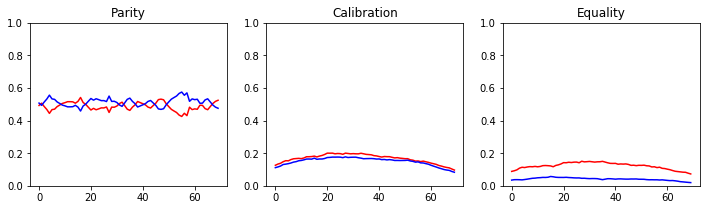

        trend0  trend1   cor  dist   sig
parity   -5.98    5.53 -0.99  0.08  0.36
cal      -3.97   -3.95  0.95  0.03  0.05
eq       -9.94  -10.78  0.32  0.09  0.00


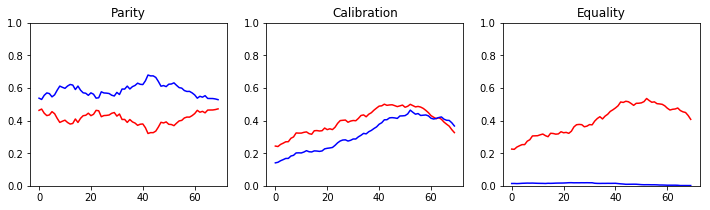

        trend0  trend1   cor  dist   sig
parity   -7.92    7.82 -0.96  0.20  0.04
cal       6.50    9.58  0.77  0.07  0.00
eq       -6.20  -51.79  0.27  0.25  0.00


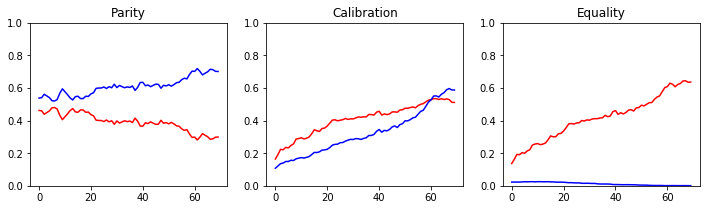

        trend0  trend1   cor  dist   sig
parity   -6.29    5.77 -0.91  0.23  0.04
cal       8.40    6.61  0.87  0.08  0.00
eq       -3.50  -76.49  0.38  0.23  0.00


In [25]:
plt.rcParams['figure.figsize'] = (4, 20)
data = generate(1000,5,0.2,99)
print("Group 0 (red) underestimated")
data['y_pred'] = add_error_under(data, 0.1, 0.)['y']
plot_all(data)
data['y_pred'] = add_error_under(data, 0.5, 0.)['y']
plot_all(data)
data['y_pred'] = add_error_under(data, 0.75, 0.)['y']
plot_all(data)

Group 1 (blue) overestimated


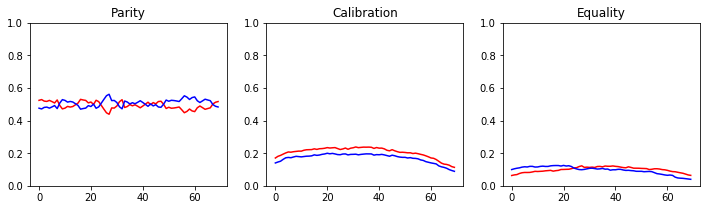

        trend0  trend1   cor  dist   sig
parity   -3.14    2.92 -1.00  0.07  0.95
cal      -4.98   -5.50  0.98  0.03  0.01
eq        2.27  -17.22  0.08  0.04  0.94


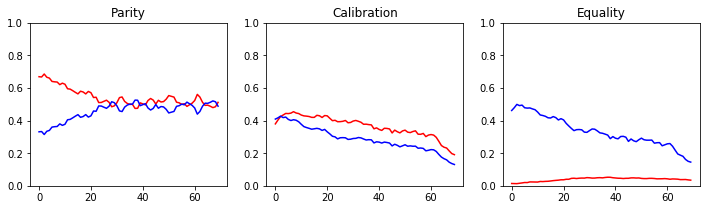

        trend0  trend1   cor  dist  sig
parity    7.63   -7.58 -0.92  0.11  0.0
cal      -7.79   -9.61  0.87  0.06  0.0
eq       32.40   -8.51 -0.84  0.20  0.0


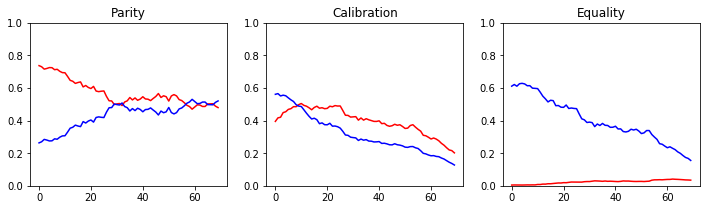

        trend0  trend1   cor  dist   sig
parity    7.31  -10.70 -0.68  0.12  0.00
cal      -6.96   -7.38  0.60  0.09  0.01
eq       28.10   -5.79 -0.79  0.25  0.00


In [26]:
print("Group 1 (blue) overestimated")
data['y_pred'] = add_error_over(data, 0.1, 0.)['y']
plot_all(data)
data['y_pred'] = add_error_over(data, 0.5, 0.)['y']
plot_all(data)
data['y_pred'] = add_error_over(data, 0.75, 0.)['y']
plot_all(data)

Group 0 (red) underestimated, Group 1 (blue) overestimated


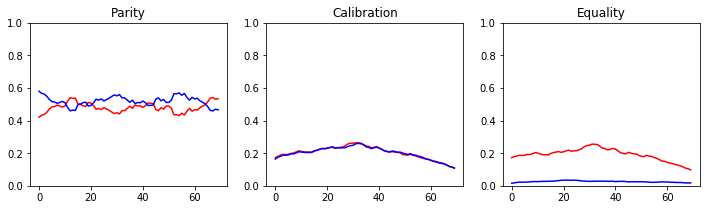

        trend0  trend1   cor  dist   sig
parity   -9.64    9.26 -0.99  0.07  0.01
cal      -6.38   -5.40  0.97  0.02  0.90
eq      -13.03    9.10 -0.04  0.17  0.00


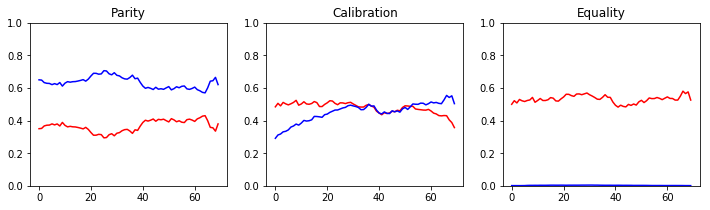

        trend0  trend1   cor  dist   sig
parity   -7.48    5.94 -0.93  0.25  0.01
cal      -8.40    9.77  0.01  0.05  0.24
eq       -6.63  121.97 -0.32  0.32  0.00


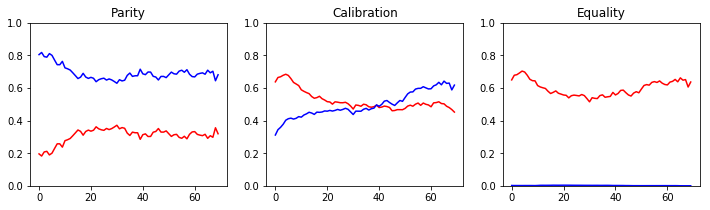

        trend0  trend1   cor  dist   sig
parity   -3.40    4.65 -0.39  0.25  0.00
cal       0.68    5.03  0.40  0.09  0.95
eq       -2.96  -20.86  0.17  0.30  0.00


In [27]:
print("Group 0 (red) underestimated, Group 1 (blue) overestimated")
data['y_pred'] = add_error_under_over(data, 0.1, 0.)['y']
plot_all(data)
data['y_pred'] = add_error_under_over(data, 0.5, 0.)['y']
plot_all(data)
data['y_pred'] = add_error_under_over(data, 0.75, 0.)['y']
plot_all(data)

In [10]:
# TEST - merge functions

# # test = [[5,0],[4,1],[3,0],[2,1],[1,0],[0,1]]
# test = [[0,1],[1,0],[2,1],[3,0],[4,1],[5,0]]
# # test = [[1,0],[0,1],[5,0],[3,0],[2,1],[4,1]]
# print("merge_1_cal")
# res, c = count_inversions(test, 0, len(test)-1, merge_fnc=merge_1_cal)
# print(res)
# print("num inversions:", c)
# print("merge_0_cal")
# res, c = count_inversions(test, 0, len(test)-1, merge_fnc=merge_0_cal)
# print(res)
# print("num inversions:", c)
# print("merge_1_over")
# res, c = count_inversions(test, 0, len(test)-1, merge_fnc=merge_1_eq)
# print(res)
# print("num inversions:", c)
# print("merge_0_over")
# res, c = count_inversions(test, 0, len(test)-1, merge_fnc=merge_0_eq)
# print(res)
# print("num inversions:", c)
# print("merge_parity_0")
# res, c = count_inversions(test, 0, len(test)-1, merge_fnc=merge_parity_0)
# print(res)
# print("num inversions:", c)
# print("merge_parity_1")
# res, c = count_inversions(test, 0, len(test)-1, merge_fnc=merge_parity_1)
# print(res)
# print("num inversions:", c)

In [11]:
# #normalized versions
# plt.rcParams['figure.figsize'] = (4, 20)
# data = generate(1000,5,0.2,99)
# plot_all(data, 0.9)
# # plot_all(data, 0.75)
# plot_all(data, 0.5)
# # plot_all(data, 0.25)
# plot_all(data, 0.1)

In [12]:
def get_all_errs(df, err, window=100, step=10):
    err0,err1 = err(df, window, step)
    errs=[]
    r0=stats.zscore(range(len(err0)))
    r1=stats.zscore(range(len(err1)))
    c0=stats.pearsonr(err0,r0)[0]
    
    c1=stats.pearsonr(err1,r1)[0]
#     print(c0,np.std(r0),np.std(err0))
    errs.append(c0 * (np.std(r0)/np.std(err0)))
    errs.append(c1 * (np.std(r1)/np.std(err1)))
    errs.append(stats.pearsonr(err0,err1)[0])
#     errs.append(np.linalg.norm(np.array(err0) - np.array(err1)))
    diffs = np.abs(np.array(err0) - np.array(err1))
    
    errs.append(np.sum(diffs) / len(err0))
    errs.append(stats.ttest_ind(err0,err1)[1])
    return errs

def norm(x):
    x = (x - np.mean(x))/np.std(x)
    

In [13]:
def plot_all_one_fig(data, props, filename): 
    rows= len(props)
    height = rows*3
    for r in props:
        plt.figure(figsize=(12, height))
        plt.subplot(rows,3,1) # equivalent to: plt.subplot(2, 2, 1)
        data['y_pred'] = add_error(data, r, 0.)['y']
        e01,e11 = sliding_kendall_parity(data, window=100, step=10)
        plt.plot(e01, color='red')
        plt.plot(e11, color='blue')
        plt.ylim([0,1])
        plt.title("Parity")

        plt.subplot(rows,3,2) # equivalent to: plt.subplot(2, 2, 1)
        e01,e11 = sliding_kendall_calibration(data, window=100, step=10)
        plt.plot(e01, color='red')
        plt.plot(e11, color='blue')
        plt.ylim([0,1])
        plt.title("Calibration")

        plt.subplot(rows,3,3) # equivalent to: plt.subplot(2, 2, 1)
        e00,e10 = sliding_kendall_eq(data, window=100, step=10)
        plt.ylim([0,1])
        plt.plot(e00, color='red')
        plt.plot(e10, color='blue')
        plt.title("Equality")
    for ax in axarr:
        ax.label_outer()
    plt.show()
#     plt.save(filename)

#     synth_errs = diagnose_k(data, 'synth_0.9')
#     print(synth_errs.round(2))

In [14]:
def plot_all_one_fig(data, props, filename): 
    rows= len(props)
#     plt.figure(figsize=(12, height))
    f, a = plt.subplots(rows, 3, sharex='col', sharey='row')
    f.suptitle('Synthetic data: vary amount of underestimation.')
#     print(a[0])
#     #first row with titles
#     data['y_pred'] = add_error(data, props[0], 0.)['y']
#     e01,e11, t0, t1 = sliding_kendall_parity(data, window=100, step=10)
#     a[0][0].plot(e01, color='red')
#     a[0][0].plot(e11, color='blue')
#     a[0][0].set_ylim([0,1])
#     a[0][0].set_title("Parity")

#     plt.subplot(rows,3,2) # equivalent to: plt.subplot(2, 2, 1)
#     e01,e11, t0, t1 = sliding_kendall_calibration(data, window=100, step=10)
#     a[0][1].plot(e01, color='red')
#     a[0][1].plot(e11, color='blue')
#     a[0][1].set_ylim([0,1])
#     a[0][1].set_title("Calibration")

#     plt.subplot(rows,3,3) # equivalent to: plt.subplot(2, 2, 1)
#     e00,e10, t0, t1 = sliding_kendall_eq(data, window=100, step=10)
#     a[0][2].set_ylim([0,1])
#     a[0][2].plot(e00, color='red')
#     a[0][2].plot(e10, color='blue')
#     a[0][2].set_title("Equality")
    
    for i in range(len(props)):
        print(i)
        data['y_pred'] = add_error(data, props[i], 0.)['y']
        e01,e11,t0,t1 = sliding_kendall_parity(data, window=100, step=10)
        a[i][0].plot(e01, color='red')
        a[i][0].plot(e11, color='blue')
        a[i][0].set_ylim([0,1])

        plt.subplot(rows,3,2) # equivalent to: plt.subplot(2, 2, 1)
        e01,e11,t0,t1 = sliding_kendall_calibration(data, window=100, step=10)
        a[i][1].plot(e01, color='red')
        a[i][1].plot(e11, color='blue')
        a[i][1].set_ylim([0,1])

        plt.subplot(rows,3,3) # equivalent to: plt.subplot(2, 2, 1)
        e00,e10,t0,t1 = sliding_kendall_eq(data, window=100, step=10)
        a[i][2].set_ylim([0,1])
        a[i][2].plot(e00, color='red')
        a[i][2].plot(e10, color='blue')
        
    for ax in a.flat:
        ax.set(xlabel='rank', ylabel='error')
# Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in a.flat:
        ax.label_outer()
    plt.show()
#     plt.save(filename)

#     synth_errs = diagnose_k(data, 'synth_0.9')
#     print(synth_errs.round(2))

0


ValueError: not enough values to unpack (expected 4, got 2)

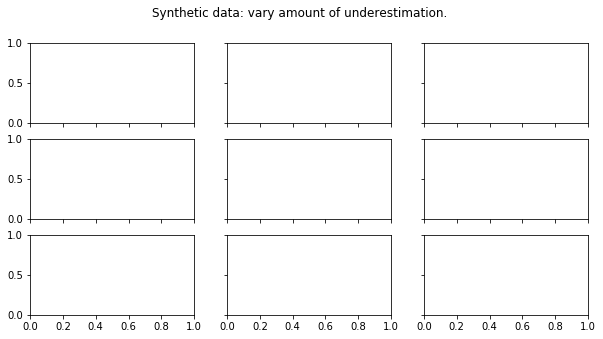

In [15]:
# plt.rcParams['figure.figsize'] = (10, 20)
plt.rcParams['figure.figsize'] = (10, 5)
# plot_all_one_fig(data, [0.1,0.25,0.5,0.75,0.9], "synth_errs.pdf")
plot_all_one_fig(data, [0.1,0.5,0.9], "synth_errs.pdf")

In [ ]:
def diagnose_t(df):
     
#     dfs= run(data_g,data_y,data_X)
    
    errs=pd.DataFrame(index=[['trend0','trend1','cor','dist','sig']])
    
    #statistical parity
    errs['parity'] = get_all_errs(df, sliding_kendall_parity, window=3, step=2)
        
    #Calibration
    errs['cal'] = get_all_errs(df, sliding_kendall_cal2, window=3, step=2)
        
    #Equalized Odds
    errs['eq'] = get_all_errs(df, sliding_kendall_eq, window=3, step=2)
        
    return errs

In [ ]:
def diagnose_k(df):
     
#     dfs= run(data_g,data_y,data_X)
    
    errs=pd.DataFrame(index=[['trend0','trend1','cor','dist','sig']])
    #statistical parity
    errs['parity'] = get_all_errs(df, sliding_kendall_parity, window=100, step=10)
        
    #Calibration
    errs['cal'] = get_all_errs(df, sliding_kendall_cal2, window=100, step=10)
        
    #Equalized Odds
    errs['eq'] = get_all_errs(df, sliding_kendall_eq, window=100, step=10)
        
    return errs

In [ ]:
# d=[1,3,5,2,7,4,9,6,8]
d = pd.DataFrame()
d['y_pred']=[9,7,5,8,3,6,1,4,2]
d['y']=[9,8,7,6,5,4,3,2,1]
d['g']=[1,1,1,0,1,0,1,0,0]
errs = diagnose_t(d)
print(errs.round(2))

In [87]:
a=[]
b=[]


stats.pearsonr([0,1,1,2],[0,1,1,1])

(0.816, 0.184)

In [91]:
stats.pearsonr([0,1,1,2],[0,1,1,1])[0]

0.816

In [96]:
np.linalg.norm(np.array([0,1,1,2]) - np.array([0,0,0,0]))

2.449

In [97]:
stats.ttest_ind([0,1,1,2],[0,0,0,0])

Ttest_indResult(statistic=2.4494897427831779, pvalue=0.049825262780576751)